In [22]:
%matplotlib inline
from src.get_data import symbols2daily_values, daily_values2filtered, df2get_batch
from src.analysis import LearningSequence
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = daily_values2filtered(symbols2daily_values())

term_dict = {
    'train': ['2011-01-01', '2014-12-31'],
    'valid': ['2015-01-01', '2015-12-31'],
    'test' : ['2016-01-01', '2016-12-31']
}
features, labels = df2get_batch(df, term_dict)

(array([  6.00000000e+00,   3.90000000e+01,   9.19000000e+02,
          5.80567000e+05,   1.24722000e+05,   3.93000000e+02,
          2.40000000e+01,   5.00000000e+00,   3.00000000e+00,
          2.00000000e+00]),
 array([-0.39187665, -0.29078242, -0.18968819, -0.08859396,  0.01250026,
         0.11359449,  0.21468872,  0.31578294,  0.41687717,  0.5179714 ,
         0.61906563]),
 <a list of 10 Patch objects>)

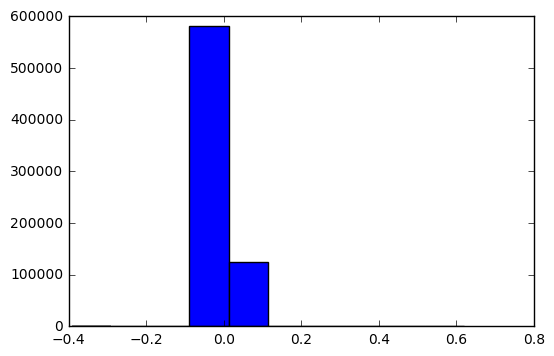

In [12]:
arr = df.pct_change()['2011':'2016'].values
plt.hist(arr.reshape(arr.shape[0] * arr.shape[1]))

In [13]:
learner = LearningSequence(features, labels)
# learner.sturcts_layer([3])
learner.inference(nb_epoch=100)

In [114]:
model = Sequential()
model.add(Conv1D(468, 3, input_shape=(6, 468)))
model.add(LSTM(468))
model.summary()

model.compile(loss='mse', optimizer=RMSprop())
history = model.fit(
    features['train'],
    labels['train'],
    batch_size=features['train'].shape[0],
    nb_epoch=1000,
    verbose=0, 
    validation_data=(features['valid'], labels['valid'])
)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution1d_40 (Convolution1D) (None, 4, 468)        657540      convolution1d_input_39[0][0]     
____________________________________________________________________________________________________
lstm_30 (LSTM)                   (None, 468)           1754064     convolution1d_40[0][0]           
Total params: 2411604
____________________________________________________________________________________________________


TypeError: 'dict_values' object is not subscriptable

In [150]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


AttributeError: module 'pydot' has no attribute 'find_graphviz'